# iRF benchmarks in R

In [1]:
source('utils/iRF_benchmarks_Rlib.R')
library(iRF)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: foreach
Loading required package: iterators
Loading required package: AUC
AUC 0.3.0
Type AUCNews() to see the change log and ?AUC to get an overview.
Loading required package: akima
iRF 1.0.0

Attaching package: ‘iRF’

The following objects are masked from ‘package:randomForest’:

    classCenter, combine, getTree, grow, importance, margin, MDSplot,
    na.roughfix, outlier, partialPlot, randomForest, rfcv, rfImpute,
    rfNews, treesize, tuneRF, varImpPlot, varUsed



## Load data

In [2]:
#load breast cancer data

raw_data <- read.delim("http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat", 
                       sep = ",", header = FALSE)
raw_data <- raw_data[, -1] # remove first column, its just an identifier

# name the columns
names(raw_data)[2:dim(raw_data)[2]] <- paste("x_", 0:29, sep="") 
names(raw_data)[1] <- 'y'

head(raw_data)

features <- as.matrix(raw_data[,-1])
responses <- rep(0,dim(features)[1])

responses[raw_data[,1] == 'M'] <- 1
responses <- as.factor(responses)



y,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,⋯,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29
M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [36]:
# load splicing data

splice.data <- read.table('Y_X_splicing.txt')
idcs.high <- splice.data$psi > 0.7
idcs.low <- splice.data$psi < 0.3
splice.data$y <- rep(0, nrow(splice.data))
splice.data$y[idcs.high] <- 1
splice.data <- splice.data[idcs.high | idcs.low,]

n.full <- nrow(splice.data)
idcs.train <- sample(1:n.full, floor(n.full * 0.5))
idcs.test <- (1:n.full)[-idcs.train]

x <- splice.data[,!colnames(splice.data) %in% c('psi', 'y')]
x <- x[,1:270]
features <- as.matrix(x)
responses <- as.factor(splice.data$y)

head(splice.data)

,MYC_body_UTA,CTCF_body_UTA,POLR2A_body_UTA,ARID3A_body_Stanford,ATF1_body_HMS,ATF3_body_HMS,BACH1_body_Stanford,BDP1_body_HMS,BHLHE40_body_Stanford,BRF1_body_HMS,⋯,AUH_body_UCSD.1,IGF2BP1_body_UCSD.1,HNRNPM_body_UCSD.1,SLTM_body_UCSD.1,IGF2BP2_body_UCSD,IGF2BP2_body_UCSD.1,LARP7_body_UCSD.1,DDX42_body_UCSD.1,psi,y
chr10_100177909_100178014_-,0,0.0000,0.0000,0,0,0,0,0,0.00000,0,⋯,0,0.000000,0,0,0.000000,0.000000,0,0,1.00000,1
chr10_100179802_100180126_-,0,0.0000,0.0000,0,0,0,0,0,0.00000,0,⋯,0,0.000000,0,0,0.000000,0.000000,0,0,1.00000,1
chr10_100185575_100185860_-,0,1.4637,0.0292,0,0,0,0,0,10.10235,0,⋯,0,4.693925,0,0,1.707351,7.245618,0,0,1.00000,1
chr10_100188908_100189399_-,0,0.0000,0.0000,0,0,0,0,0,0.00000,0,⋯,0,0.000000,0,0,0.000000,0.000000,0,0,1.00000,1
chr10_100188913_100189399_-,0,0.0000,0.0000,0,0,0,0,0,0.00000,0,⋯,0,0.000000,0,0,0.000000,0.000000,0,0,1.00000,1
chr10_100194843_100195171_-,0,0.0000,0.0000,0,0,0,0,0,0.00000,0,⋯,0,0.000000,0,0,2.118391,0.000000,0,0,0.81847,1


## Call function to run benchmarks

In [6]:
train_split_propn = 0.8
n_estimators = 100
n_trials = 10

benchmarks <- RF_benchmarks(features, responses, train_split_propn = train_split_propn, 
                            n_estimators = n_estimators, n_trials=n_trials)

## Lets look at the results

### Relevant parameters

In [7]:
cat('Dimensions of full dataset (#samples , # features): ', dim(features), '\n')
cat('Number of training samples: ', round(dim(features)[1] * train_split_propn), '\n')
cat('Number of test samples: ', round(dim(features)[1]*(1-train_split_propn)),  '\n')
cat('number of trees in the random forest: ', n_estimators)

Dimensions of full dataset (#samples , # features):  569 30 
Number of training samples:  455 
Number of test samples:  114 
number of trees in the random forest:  100

### Timing and some accuracy scores across trials

In [8]:
print('mean and std of various metrics across trials')
benchmarks$metrics_summary

[1] "mean and std of various metrics across trials"


$times
[1] 0.08033733 0.07850778

$score
[1] 0.974561404 0.004979353

$OOB_error
[1] 0.042417582 0.004639162

$class1_error
[1] 0.027573529 0.005271033

$class2_error
[1] 0.064480874 0.008465537

### Stability of feature importances across trials

In [9]:
print('top five feature importances across trials')

for(i in 1:n_trials){ 
    # sort by feature importance
    x <- benchmarks$feature_importance[[i]]
    ord <- order(x, decreasing = TRUE)
    print(ord[0:10] - 1) # -1 to compare with python output
    #x <- x[ord, ]
    #print(x[0:5])    
    
    }


[1] "top five feature importances across trials"
 [1] 27 22 23  7 20  6  2  0  3 26
 [1] 23  7 22 27 20  0  3  6 26  2
 [1] 22 27 23  7 20  3  2 13  6 26
 [1] 27 23 22  7 20  3 26  2 13  6
 [1] 20 23 22 27  7  2  6 13  0 26
 [1] 22 23 27  7 20  3  0  2  6 26
 [1] 20 23 27 22  7 26  6  0  2  3
 [1] 23 27 22 20  3  7  2  0 26 13
 [1] 22 23 27 20  7  6  2  3  0 13
 [1] 22 27 23 20  7  2  3 13  6  0


# iRF benchmarks

In [3]:
n_trials <- 1
iRF_bm <- iRF_benchmarks(features, responses, n_trials=n_trials,
                   K=5,
                   train_split_propn=0.8,
                   n_estimators=20,
                   B=30,
                   M=20,
                   max_depth=5,
                   noisy_split=False,
                   num_splits=2,
                   seed=2018)



[1] "iteration =  1"
finding interactions ... b = 1;  
b = 2;  
b = 3;  
b = 4;  
b = 5;  
b = 6;  
b = 7;  
b = 8;  
b = 9;  
b = 10;  
b = 11;  
b = 12;  
b = 13;  
b = 14;  
b = 15;  
b = 16;  
b = 17;  
b = 18;  
b = 19;  
b = 20;  
b = 21;  
b = 22;  
b = 23;  
b = 24;  
b = 25;  
b = 26;  
b = 27;  
b = 28;  
b = 29;  
b = 30;  
[1] "AUROC:  0.98"
[1] "iteration =  2"
finding interactions ... b = 1;  
b = 2;  
b = 3;  
b = 4;  
b = 5;  
b = 6;  
b = 7;  
b = 8;  
b = 9;  
b = 10;  
b = 11;  
b = 12;  
b = 13;  
b = 14;  
b = 15;  
b = 16;  
b = 17;  
b = 18;  
b = 19;  
b = 20;  
b = 21;  
b = 22;  
b = 23;  
b = 24;  
b = 25;  
b = 26;  
b = 27;  
b = 28;  
b = 29;  
b = 30;  
[1] "AUROC:  0.98"
[1] "iteration =  3"
finding interactions ... b = 1;  
b = 2;  
b = 3;  
b = 4;  
b = 5;  
b = 6;  
b = 7;  
b = 8;  
b = 9;  
b = 10;  
b = 11;  
b = 12;  
b = 13;  
b = 14;  
b = 15;  
b = 16;  
b = 17;  
b = 18;  
b = 19;  
b = 20;  
b = 21;  
b = 22;  
b = 23;  
b = 24;  
b = 25;  
b

### Timing and some accuracy scores across trials
These are metrics on the random forest at iteration K

In [4]:
print('mean and std of various metrics across trials')
iRF_bm$metrics_summary

[1] "mean and std of various metrics across trials"


$times
[1] 3.179393       NA

$score
[1] 0.9473684        NA

### Lets look the stability of feature importances across trials
Again, feature importances are measured for the last forest

In [5]:
print('top five feature importances across trials')

for(i in 1:n_trials){ 
    # sort by feature importance
    x <- iRF_bm$feature_importance[[i]]
    ord <- order(x, decreasing = TRUE)
    print(ord[0:10] - 1) # -1 to compare with python output
    #x <- x[ord, ]
    #print(x[0:5])    
    
    }

[1] "top five feature importances across trials"
 [1] 22 23 27 21  7  1 13 20 10  0


### Finally, lets examine the discovered interactions across trials 

              x_22               x_23               x_21               x_27 
        1.00000000         0.90000000         0.66666667         0.66666667 
               x_7          x_21_x_22          x_22_x_23          x_23_x_27 
        0.53333333         0.50000000         0.50000000         0.50000000 
         x_21_x_23          x_22_x_27           x_7_x_22           x_7_x_21 
        0.46666667         0.46666667         0.33333333         0.30000000 
          x_7_x_23               x_20                x_1           x_7_x_27 
        0.30000000         0.26666667         0.23333333         0.23333333 
          x_1_x_23          x_21_x_27           x_1_x_22      x_7_x_21_x_22 
        0.20000000         0.16666667         0.16666667         0.16666667 
         x_20_x_21          x_20_x_27     x_21_x_22_x_23          x_20_x_22 
        0.13333333         0.13333333         0.10000000         0.06666667 
     x_7_x_21_x_23      x_7_x_22_x_23      x_7_x_23_x_27     x_20_x_21_x_22 

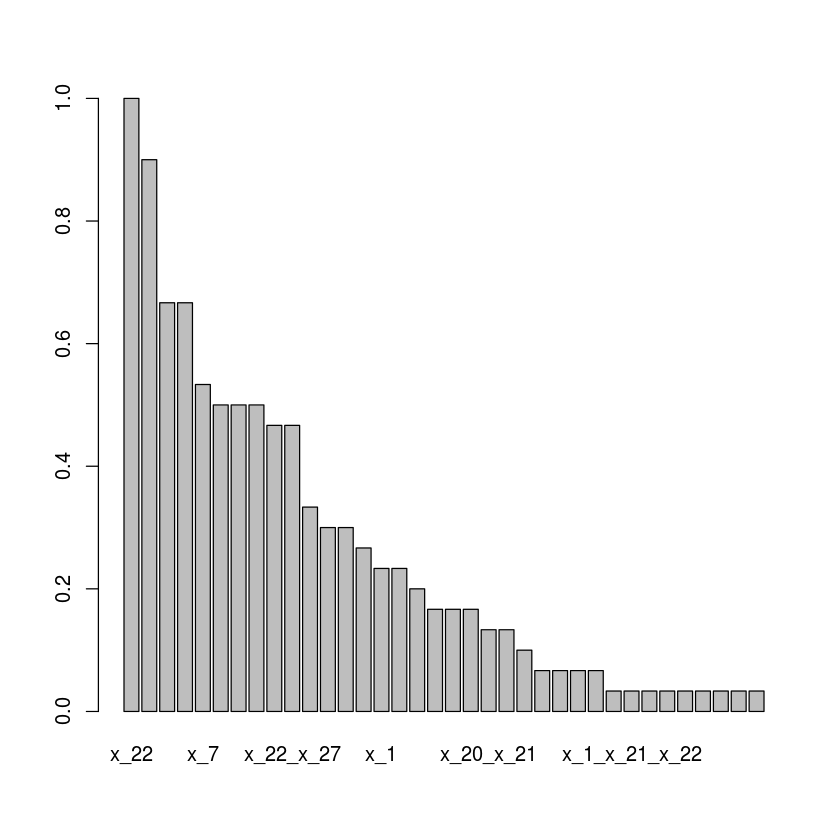

In [11]:
for(i in 1:n_trials){ 
    # sort by feature importance
    x <- iRF_bm$stability_all[[i]]
    print(x)
    }
barplot(x)